In [115]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import sem
import pingouin as pg
from scipy import stats
import scikit_posthocs as sp
import tensorflow as tf 
from tensorflow import keras
import easygui
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import matplotlib.ticker as ticker
OUTDATED_IGNORE=1
notnorm = True
import pickle
import itertools
import scipy.io
from xgboost import XGBClassifier
import os 

In [116]:
# Difine pathways 
save_to = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/"
df = pd.read_excel("C:\\Users\gniew\\Desktop\\PRACA\\Bio_fizyka\\PANC\\Panc_merge.xlsx")

In [117]:
# 0 = Normoksja 1 = Hipoksja

In [118]:
df["Label"] = df["Label"].apply(lambda x: 0 if "Normoksja" in x else 1)

In [119]:
df["Label"]

0      0
1      0
2      0
3      0
4      0
      ..
257    0
258    0
259    0
260    0
261    0
Name: Label, Length: 262, dtype: int64

In [120]:
def normalize(data):
    scaler = MinMaxScaler()
    data_reshaped = np.array(data).reshape(-1, 1)
    scaler.fit(data_reshaped)
    data_norm = scaler.transform(data_reshaped)
    return scaler, data_norm

In [121]:
to_norm = list(df.columns)
to_norm.remove("Label")
to_norm

['Area', 'Mean', 'Perim,', 'Circ,', 'AR', 'Round', 'Solidity']

In [122]:

scaler_list = []
for i in to_norm:
    scaler, data_norm = normalize(df[i])
    df[i] = data_norm
    scaler_list.append(scaler)
    pickle.dump(scaler, open(save_to + f'scaler_{i}.pkl', 'wb'))
    

### Data visualisation 

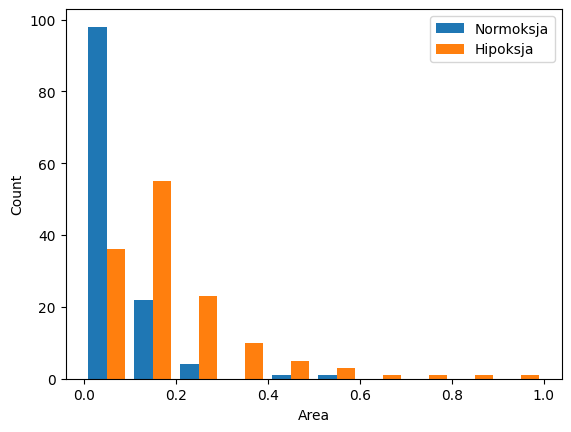

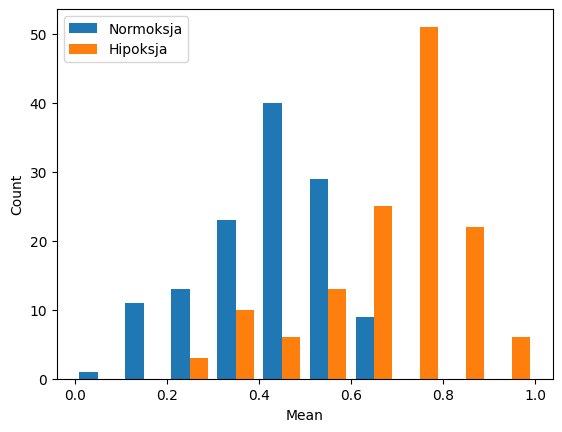

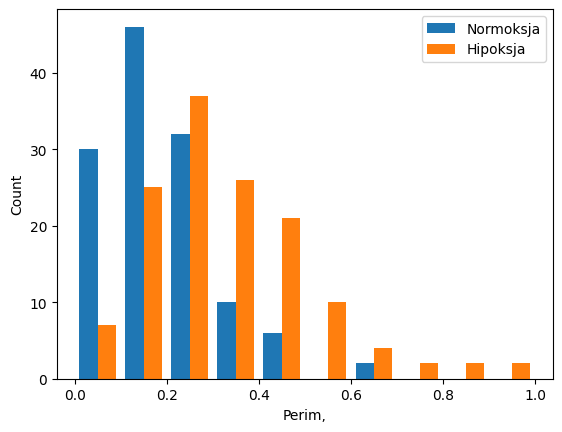

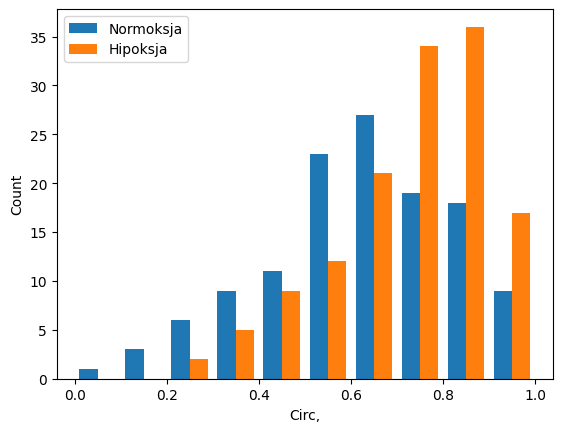

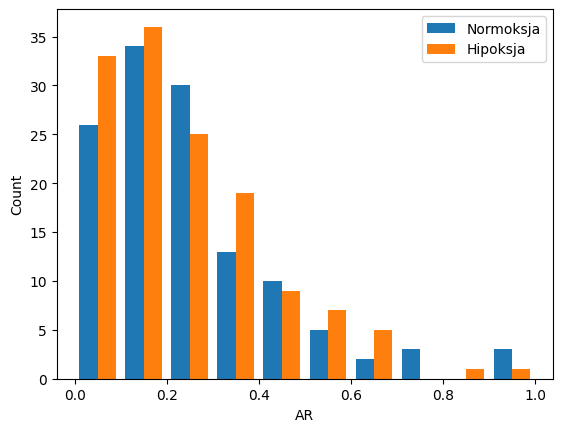

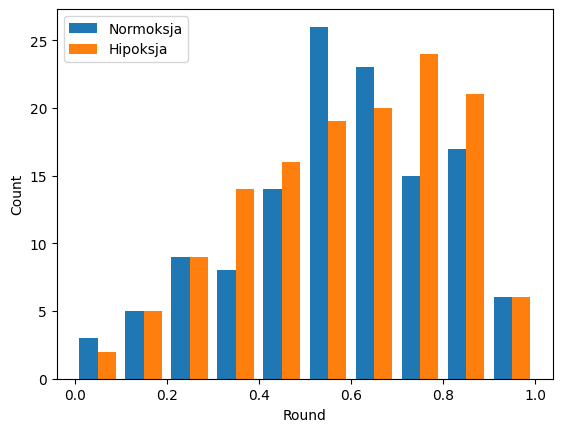

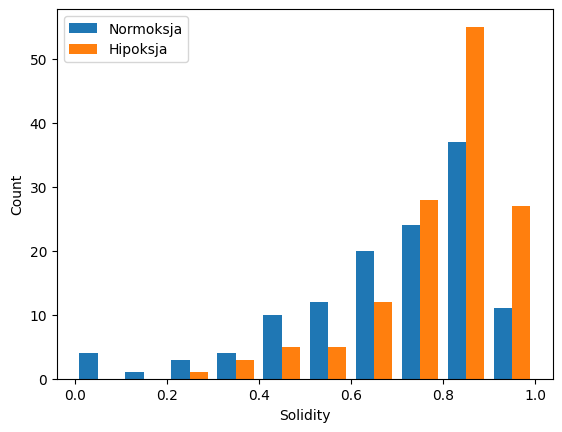

In [9]:
for i in to_norm:
        ans_1 = df.loc[df["Label"] == 0, i]
        ans_2 = df.loc[df["Label"] == 1, i]
        plt.hist([ans_1, ans_2], label = ["Normoksja", "Hipoksja"])
        plt.legend()
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

In [10]:
df =df.sample(frac=1)

In [11]:
df

Label      Area      Mean    Perim,     Circ,        AR     Round  \
207      0  0.070096  0.318718  0.162437  0.681476  0.481204  0.290652   
69       1  0.117558  0.776942  0.217238  0.847929  0.051281  0.875502   
211      0  0.063512  0.508173  0.218290  0.327881  0.456232  0.311755   
61       1  0.257202  0.692778  0.418812  0.758800  0.463217  0.305746   
255      0  0.070233  0.432545  0.161432  0.689426  0.147787  0.686690   
..     ...       ...       ...       ...       ...       ...       ...   
30       0  0.018519  0.471840  0.027020  0.869092  0.043191  0.893852   
142      1  0.188340  0.563427  0.329097  0.782320  0.260790  0.518609   
111      1  0.220165  0.761166  0.350048  0.874009  0.151591  0.680212   
188      0  0.027298  0.149185  0.053170  0.820534  0.313042  0.454749   
63       1  0.162140  0.700725  0.320633  0.653606  0.080942  0.811868   

     Solidity  
207  0.804724  
69   0.842624  
211  0.364386  
61   0.875576  
255  0.733721  
..        ...  
30   0.839363  
142  0.846261  
111  0.901593  
188  0.824892  
63   0.672577  

[262 rows x 8 columns]

### DATA SPLIT 

In [12]:
y = df["Label"]
df.drop("Label", inplace = True, axis = 1)
X = df

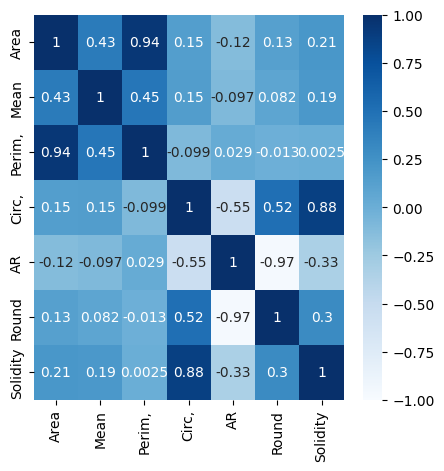

In [13]:
corr = X.corr()

ax, fig = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, vmin=-1, cmap=plt.cm.Blues, annot=True)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Feature_corr_matrix.svg"
plt.savefig(save_fig_to)
plt.show()

In [42]:

random_state = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size = 0.7)
#X_test.drop("Mean", inplace = True, axis = 1)
#X_train.drop("Mean", inplace = True, axis = 1)
X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
features_ = list(X_train.columns)

In [43]:
X_train

Area    Perim,     Circ,        AR     Round  Solidity      Mean
229  0.238683  0.442366  0.582825  0.470922  0.299219  0.808247  0.567350
245  0.047188  0.212849  0.191893  0.708260  0.135349  0.476101  0.254800
83   0.050206  0.111224  0.758361  0.104999  0.764123  0.888960  0.625654
65   0.103292  0.198403  0.824866  0.090571  0.792368  0.881350  0.677825
109  0.231824  0.368736  0.850031  0.155627  0.673426  0.949241  0.711907
..        ...       ...       ...       ...       ...       ...       ...
127  0.155144  0.250142  0.977320  0.067602  0.839790  0.954339  0.395230
27   0.075583  0.268566  0.244526  0.016192  0.958506  0.298444  0.541775
120  0.151578  0.277243  0.791495  0.313909  0.453744  0.861818  0.867636
103  0.199314  0.424029  0.463979  0.568685  0.223746  0.741368  0.562090
3    0.161180  0.417911  0.300925  0.535892  0.247635  0.493871  0.442175

[183 rows x 7 columns]

### Supporter Vector Clasifier

{'0': {'precision': 0.85, 'recall': 0.918918918918919, 'f1-score': 0.8831168831168831, 'support': 37}, '1': {'precision': 0.9230769230769231, 'recall': 0.8571428571428571, 'f1-score': 0.888888888888889, 'support': 42}, 'accuracy': 0.8860759493670886, 'macro avg': {'precision': 0.8865384615384615, 'recall': 0.888030888030888, 'f1-score': 0.886002886002886, 'support': 79}, 'weighted avg': {'precision': 0.8888510223953263, 'recall': 0.8860759493670886, 'f1-score': 0.8861855444133926, 'support': 79}}
y_test: [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],  y_pred: [0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 1]


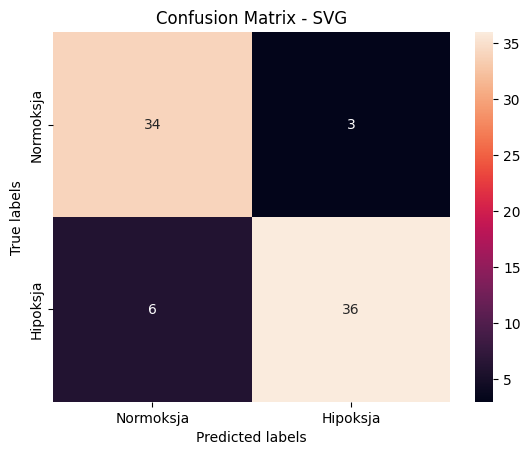

In [85]:
param_grid = [{"C": [0.5, 1, 10, 100],
              "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ["linear", "poly", "rbf"]},
]
optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=10,
                             scoring = "accuracy")
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
best_clf = optimal_params.fit(X_train_scaled, y_train)
parameters= best_clf.best_params_
parameters= list(parameters.values())

model = SVC(C = parameters[0], gamma = parameters[1], kernel = parameters[2])
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
raport = classification_report(y_test,y_pred,output_dict = True)
print(raport)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(f"y_test: {list(y_test)},  y_pred: {y_pred}")
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats = 15, scoring = "accuracy")
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVG')
ax.xaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
ax.yaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
plt.savefig(save_to + "/SVC_test.svg")
plt.show()

In [87]:
# Save report result 
df_log_test = pd.DataFrame(raport)
df_log_test = df_log_test.transpose()
df_log_test.to_excel(save_to + "/SVC_test.xlsx")

In [17]:
list(zip(features_ ,perm_importance.get("importances_mean")))

[('Area', 0.03206751054852316),
 ('Perim,', 0.028691983122362822),
 ('Circ,', 0.02531645569620249),
 ('AR', -0.02109704641350214),
 ('Round', -0.012658227848101318),
 ('Solidity', 0.007594936708860733),
 ('Mean', 0.24219409282700416)]

#### Cross validation

In [66]:
kf = KFold(n_splits=10, shuffle=True)

acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_normo = np.empty((10,1))
recall_arr_hipo = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_normo = np.empty((10,1))
precision_arr_hipo = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_normo = np.empty((10,1))
f1_arr_hipo = np.empty((10,1))

#df_modeling_summary = pd.DataFrame(index = [1,2,3,4,5], columns = ["model", "accuracy_avg", "accuracy_sem", "f1-score_avg", "f1-score_sem", "f1-score_normo", "f1-score_hipo", "recall_avg", "recall_sem", "recall_normo", "recall_hipo", "precision_avg", "precision_sem", "precision_normo", "precision_hipo"])
#df_feature_importance = pd.DataFrame(index = [1,2,3,4,5], columns = ["model", "area_avg", "area_sem",  "perim_avg", "perim_sem", "circ_avg", "circ_sem", "ar_avg", "ar_sem", "round_avg", "round_sem", "solidity_avg", "solidity_sem", "mean_avg", "mean_sem"])

area_arr = np.empty((10, 1))
perim_arr = np.empty((10, 1))
circ_arr = np.empty((10, 1))
ar_arr = np.empty((10, 1))
round_arr = np.empty((10, 1))
solidity_arr = np.empty((10, 1))
mean_arr = np.empty((10, 1))

In [67]:
param_grid = [{"C": [0.01, 0.1 ,0.5, 1, 10, 100, 500, 1000],
              "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ["linear", "poly", "rbf"]},
]

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    optimal_params = GridSearchCV(SVC(),
                                 param_grid,
                                 cv=10,
                                 scoring = "accuracy")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    
    X_train_scaled = scale(X_train)
    X_test_scaled = scale(X_test)
    best_clf = optimal_params.fit(X_train_scaled, y_train)
    parameters= best_clf.best_params_
    print(parameters)
    parameters = list(parameters.values())
    model = SVC(C = parameters[0], gamma = parameters[1], kernel = parameters[2])
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats = 15, scoring = "accuracy")
    
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    recall_arr[i] =recall_score(y_test, y_pred,  average='weighted')
    
    raport = classification_report(y_test,y_pred,output_dict=True, zero_division=0)
    
    values_normo= list(raport["0"].values())
    precision_arr_normo[i] = values_normo[0]
    recall_arr_normo[i] = values_normo[1]
    f1_arr_normo[i] = values_normo[2]
    
    values_hipo= list(raport["1"].values())
    precision_arr_hipo[i] = values_hipo[0] 
    recall_arr_hipo[i] = values_hipo[1]
    f1_arr_hipo[i] = values_hipo[2]
    
    area_arr[i] = perm_importance.get("importances_mean")[0]
    perim_arr[i] = perm_importance.get("importances_mean")[1]
    circ_arr[i] = perm_importance.get("importances_mean")[2]
    ar_arr[i] = perm_importance.get("importances_mean")[3]
    round_arr[i] = perm_importance.get("importances_mean")[4]
    solidity_arr[i] = perm_importance.get("importances_mean")[5]
    mean_arr[i] = perm_importance.get("importances_mean")[6]
    
    
    print(f"Fold {i+1}/{acc_arr.shape[0]}")
    print(f"y_test: {list(y_test)},  y_pred: {y_pred}")
    print(list(zip(features_ ,perm_importance.get("importances_mean"))))
    values_weighted_avg = list(raport["weighted avg"].values())
    
    

precision_arr = precision_arr[precision_arr != 0]
precision_arr_normo = precision_arr_normo[precision_arr_normo != 0]
precision_arr_hipo = precision_arr_hipo[precision_arr_hipo != 0]

f1_arr = f1_arr[f1_arr != 0]
f1_arr_normo = f1_arr_normo[f1_arr_normo != 0]
f1_arr_hipo = f1_arr_hipo[f1_arr_hipo != 0]

list_SVG = ["SVG", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_normo.mean(),2), round(f1_arr_hipo.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_normo.mean(),2), round(recall_arr_hipo.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_normo.mean(),2), round(precision_arr_hipo.mean(),2)]
list_SVG_features_no_mean = [ "SVG", round(area_arr.mean(), 2),  round(float(sem(area_arr)),2), round(perim_arr.mean(), 2),  round(float(sem(perim_arr)),2), round(circ_arr.mean(), 2),  round(float(sem(circ_arr)),2), round(ar_arr.mean(), 2),  round(float(sem(ar_arr)),2), round(round_arr.mean(), 2),  round(float(sem(round_arr)),2),  round(solidity_arr.mean(), 2),  round(float(sem(solidity_arr)),2)]
list_SVG_features = [ "SVG", round(area_arr.mean(), 2),  round(float(sem(area_arr)),2), round(perim_arr.mean(), 2),  round(float(sem(perim_arr)),2), round(circ_arr.mean(), 2),  round(float(sem(circ_arr)),2), round(ar_arr.mean(), 2),  round(float(sem(ar_arr)),2), round(round_arr.mean(), 2),  round(float(sem(round_arr)),2),  round(solidity_arr.mean(), 2),  round(float(sem(solidity_arr)),2), round(mean_arr.mean(), 2),  round(float(sem(mean_arr)),2)]

df_modeling_summary.loc[1] = list_SVG
df_feature_importance.loc[1] = list_SVG_features

df_modeling_summary

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Fold 1/10
y_test: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0],  y_pred: [0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0]
[('Area', 0.15555555555555559), ('Perim,', 0.05185185185185182), ('Circ,', 0.13580246913580243), ('AR', 0.004938271604938257), ('Round', 0.05185185185185182), ('Solidity', 0.039506172839506144), ('Mean', 0.22469135802469134)]
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fold 2/10
y_test: [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],  y_pred: [1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0]
[('Area', 0.019753086419753114), ('Perim,', 0.03209876543209879), ('Circ,', 0.0666666666666667), ('AR', 0.054320987654321015), ('Round', 0.05185185185185188), ('Solidity', 0.0), ('Mean', 0.27654320987654324)]
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Fold 3/10
y_test: [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], 

model accuracy_avg accuracy_sem f1-score_avg  \
1                       SVG         0.86         0.02         0.86   
2       Logistic_Regression         0.84         0.02         0.84   
3  Random_Forest_Classifier         0.83         0.02         0.83   
4            Neural Network         0.85         0.01         0.85   
5                       NaN          NaN          NaN          NaN   

  f1-score_sem f1-score_normo f1-score_hipo recall_avg recall_sem  \
1         0.02           0.86          0.87       0.86       0.02   
2         0.02           0.84          0.84       0.84       0.02   
3         0.02           0.83          0.83       0.83       0.02   
4         0.01           0.84          0.85       0.85       0.01   
5          NaN            NaN           NaN        NaN        NaN   

  recall_normo recall_hipo precision_avg precision_sem precision_normo  \
1         0.89        0.85          0.87          0.01            0.84   
2         0.88        0.82          0.86          0.02            0.81   
3         0.86        0.81          0.84          0.02            0.82   
4         0.83        0.86          0.86          0.01            0.85   
5          NaN         NaN           NaN           NaN             NaN   

  precision_hipo  
1           0.89  
2           0.87  
3           0.86  
4           0.85  
5            NaN

### Logistic Regression 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size = 0.7)
X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
features_ = list(X_train.columns)

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.08858667904100823, 'max_iter': 5, 'penalty': 'none', 'solver': 'sag'}
{'0': {'precision': 0.8095238095238095, 'recall': 0.918918918918919, 'f1-score': 0.860759493670886, 'support': 37}, '1': {'precision': 0.918918918918919, 'recall': 0.8095238095238095, 'f1-score': 0.860759493670886, 'support': 42}, 'accuracy': 0.8607594936708861, 'macro avg': {'precision': 0.8642213642213643, 'recall': 0.8642213642213643, 'f1-score': 0.860759493670886, 'support': 79}, 'weighted avg': {'precision': 0.8676832347718424, 'recall': 0.8607594936708861, 'f1-score': 0.8607594936708859, 'support': 79}}


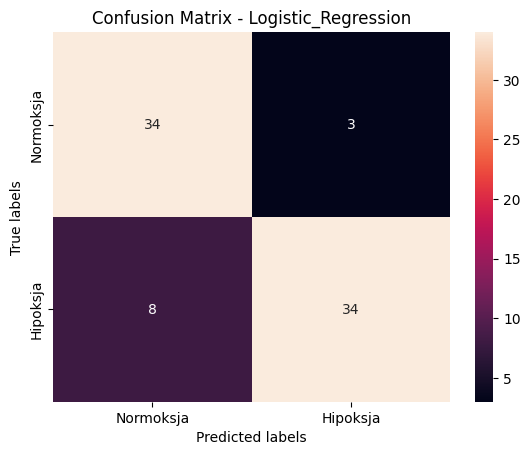

In [92]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [ 5, 10,20, 50 ,100, 1000,2500]
    }
]

clf = GridSearchCV(LogisticRegression(), 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=True, n_jobs=-1, 
                       scoring = "accuracy")

best_clf = clf.fit(X_train, y_train)
parameters= best_clf.best_params_
print(parameters)
parameters= list(parameters.values())

logModel = LogisticRegression(C =  parameters[0], max_iter = parameters[1], penalty = parameters[2], solver = parameters[3])
logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)
raport = classification_report(y_test,y_pred,output_dict = True)
print(raport)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic_Regression')
ax.xaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
ax.yaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
plt.savefig(save_to + "/Log_test.svg")
plt.show()

In [94]:
# Save report result 
df_log_test = pd.DataFrame(raport)
df_log_test = df_log_test.transpose()
df_log_test.to_excel(save_to + "/Log_test.xlsx")

#### Cross validation 

In [63]:
kf = KFold(n_splits=10, shuffle=True)

acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_normo = np.empty((10,1))
recall_arr_hipo = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_normo = np.empty((10,1))
precision_arr_hipo = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_normo = np.empty((10,1))
f1_arr_hipo = np.empty((10,1))

area_arr = np.empty((10, 1))
perim_arr = np.empty((10, 1))
circ_arr = np.empty((10, 1))
ar_arr = np.empty((10, 1))
round_arr = np.empty((10, 1))
solidity_arr = np.empty((10, 1))
mean_arr = np.empty((10, 1))

In [64]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [ 5, 10,20, 50 ,100, 1000,2500]
    }
]

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    clf = GridSearchCV(LogisticRegression(), 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=True, n_jobs=-1, 
                       scoring = "accuracy")
    
    
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    
    
    best_clf = clf.fit(X_train, y_train)
    parameters= best_clf.best_params_
    print(parameters)
    parameters= list(parameters.values())
    logModel = LogisticRegression(C =  parameters[0], max_iter = parameters[1], penalty = parameters[2], solver = parameters[3])
    logModel.fit(X_train, y_train)
    y_pred = logModel.predict(X_test)
    
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    recall_arr[i] =recall_score(y_test, y_pred,  average='weighted')
    perm_importance = permutation_importance(logModel, X_test, y_test, n_repeats = 15, scoring = "accuracy")
    raport = classification_report(y_test,y_pred,output_dict=True, zero_division=0)
    
    values_normo= list(raport["0"].values())
    precision_arr_normo[i] = values_normo[0]
    recall_arr_normo[i] = values_normo[1]
    f1_arr_normo[i] = values_normo[2]
    
    values_hipo= list(raport["1"].values())
    precision_arr_hipo[i] = values_hipo[0] 
    recall_arr_hipo[i] = values_hipo[1]
    f1_arr_hipo[i] = values_hipo[2]
    print(f"Fold {i+1}/{acc_arr.shape[0]}")
    print(f"y_test: {list(y_test)},  y_pred: {y_pred}")
    values_weighted_avg = list(raport["weighted avg"].values())
    
    area_arr[i] = perm_importance.get("importances_mean")[0]
    perim_arr[i] = perm_importance.get("importances_mean")[1]
    circ_arr[i] = perm_importance.get("importances_mean")[2]
    ar_arr[i] = perm_importance.get("importances_mean")[3]
    round_arr[i] = perm_importance.get("importances_mean")[4]
    solidity_arr[i] = perm_importance.get("importances_mean")[5]
    mean_arr[i] = perm_importance.get("importances_mean")[6]
    
    
    

precision_arr = precision_arr[precision_arr != 0]
precision_arr_normo = precision_arr_normo[precision_arr_normo != 0]
precision_arr_hipo = precision_arr_hipo[precision_arr_hipo != 0]

f1_arr = f1_arr[f1_arr != 0]
f1_arr_normo = f1_arr_normo[f1_arr_normo != 0]
f1_arr_hipo = f1_arr_hipo[f1_arr_hipo != 0]

list_Log = ["Logistic_Regression", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_normo.mean(),2), round(f1_arr_hipo.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_normo.mean(),2), round(recall_arr_hipo.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_normo.mean(),2), round(precision_arr_hipo.mean(),2)]

list_Log_features_no_mean = [ "Logistic_Regression", round(area_arr.mean(), 2),  round(float(sem(area_arr)),2), round(perim_arr.mean(), 2),  round(float(sem(perim_arr)),2), round(circ_arr.mean(), 2),  round(float(sem(circ_arr)),2), round(ar_arr.mean(), 2),  round(float(sem(ar_arr)),2), round(round_arr.mean(), 2),  round(float(sem(round_arr)),2),  round(solidity_arr.mean(), 2),  round(float(sem(solidity_arr)),2)]
list_Log_features = [ "Logistic_Regression", round(area_arr.mean(), 2),  round(float(sem(area_arr)),2), round(perim_arr.mean(), 2),  round(float(sem(perim_arr)),2), round(circ_arr.mean(), 2),  round(float(sem(circ_arr)),2), round(ar_arr.mean(), 2),  round(float(sem(ar_arr)),2), round(round_arr.mean(), 2),  round(float(sem(round_arr)),2),  round(solidity_arr.mean(), 2),  round(float(sem(solidity_arr)),2), round(mean_arr.mean(), 2),  round(float(sem(mean_arr)),2)]



df_modeling_summary.loc[2] = list_Log
df_feature_importance.loc[2] = list_Log_features

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 206.913808111479, 'max_iter': 5, 'penalty': 'l2', 'solver': 'saga'}
Fold 1/10
y_test: [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],  y_pred: [0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.615848211066026, 'max_iter': 5, 'penalty': 'none', 'solver': 'saga'}
Fold 2/10
y_test: [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1],  y_pred: [1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.23357214690901212, 'max_iter': 5, 'penalty': 'none', 'solver': 'saga'}
Fold 3/10
y_test: [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],  y_pred: [1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.012742749857031334, 'max_iter': 5, 'penalty': 'none', 'solver': 'saga'}
Fold 4/10
y_test: [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1],  y_pred: [0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 10000.0, 'max_iter': 5, 'penalty': 'l1', 'solver': 'saga'}
Fold 5/10
y_test: [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],  y_pred: [0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 11.288378916846883, 'max_iter': 5, 'penalty': 'none', 'solver': 'saga'}
Fold 6/10
y_test: [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],  y_pred: [1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.23357214690901212, 'max_iter': 5, 'penalty': 'l2', 'solver': 'sag'}
Fold 7/10
y_test: [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0],  y_pred: [0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 11.288378916846883, 'max_iter': 5, 'penalty': 'none', 'solver': 'sag'}
Fold 8/10
y_test: [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0],  y_pred: [1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.0018329807108324356, 'max_iter': 5, 'penalty': 'none', 'solver': 'saga'}
Fold 9/10
y_test: [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],  y_pred: [0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0]
Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12600 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\linear_model\_logistic.py", line 

{'C': 0.00026366508987303583, 'max_iter': 5, 'penalty': 'none', 'solver': 'saga'}
Fold 10/10
y_test: [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1],  y_pred: [0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1]


In [34]:
df_modeling_summary

model accuracy_avg accuracy_sem f1-score_avg f1-score_sem  \
1                  SVG         0.83         0.02         0.83         0.02   
2  Logistic_Regression         0.84         0.02         0.84         0.02   
3                  NaN          NaN          NaN          NaN          NaN   
4                  NaN          NaN          NaN          NaN          NaN   
5                  NaN          NaN          NaN          NaN          NaN   

  f1-score_normo f1-score_hipo recall_avg recall_sem recall_normo recall_hipo  \
1           0.83          0.83       0.83       0.02         0.86        0.82   
2           0.84          0.83       0.84       0.02         0.89        0.81   
3            NaN           NaN        NaN        NaN          NaN         NaN   
4            NaN           NaN        NaN        NaN          NaN         NaN   
5            NaN           NaN        NaN        NaN          NaN         NaN   

  precision_avg precision_sem precision_normo precision_hipo  
1          0.85          0.02            0.81           0.86  
2          0.86          0.02            0.82           0.87  
3           NaN           NaN             NaN            NaN  
4           NaN           NaN             NaN            NaN  
5           NaN           NaN             NaN            NaN

### Random Forest

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size = 0.7)
X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
features_ = list(X_train.columns)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


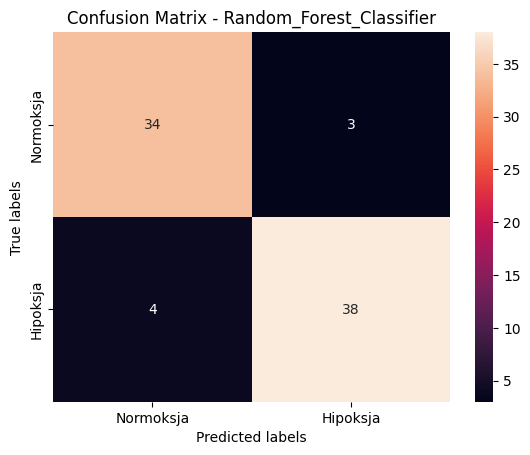

In [98]:
param_grid = [{ 
    'n_estimators': [10, 100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2,4,5,6,7,8, 10],
    'criterion' :['gini', 'entropy']
}]
clf = GridSearchCV(RandomForestClassifier(), 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=True, n_jobs=-1, 
                       scoring = "accuracy")

best_clf = clf.fit(X_train, y_train)
parameters= best_clf.best_params_
print(parameters)
parameters= list(parameters.values())
rfcModel = RandomForestClassifier(criterion=  parameters[0], max_depth = parameters[1], max_features= parameters[2], n_estimators= parameters[3])
rfcModel.fit(X_train, y_train)
y_pred = rfcModel.predict(X_test)

raport = classification_report(y_test, y_pred, output_dict = True)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)




fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random_Forest_Classifier')
ax.xaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
ax.yaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
plt.savefig(save_to + "/Rfc_test.svg")
plt.show()

In [99]:
# Save report result 
df_log_test = pd.DataFrame(raport)
df_log_test = df_log_test.transpose()
df_log_test.to_excel(save_to + "/Rfc_test.xlsx")

In [58]:
kf = KFold(n_splits=10, shuffle=True)

acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_normo = np.empty((10,1))
recall_arr_hipo = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_normo = np.empty((10,1))
precision_arr_hipo = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_normo = np.empty((10,1))
f1_arr_hipo = np.empty((10,1))

area_arr = np.empty((10, 1))
perim_arr = np.empty((10, 1))
circ_arr = np.empty((10, 1))
ar_arr = np.empty((10, 1))
round_arr = np.empty((10, 1))
solidity_arr = np.empty((10, 1))
mean_arr = np.empty((10, 1))

In [59]:


 param_grid = [{ 
    'n_estimators': [1, 10, 100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2,4,5,6,7,8, 10],
    'criterion' :['gini', 'entropy']
}]

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    clf = GridSearchCV(RandomForestClassifier(), 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=True, n_jobs=-1, 
                       scoring = "accuracy")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #X_test.drop("Mean", inplace = True, axis = 1)
    #X_train.drop("Mean", inplace = True, axis = 1)
    X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    
    best_clf = clf.fit(X_train, y_train)
    parameters= best_clf.best_params_
    print(parameters)
    parameters= list(parameters.values())
    rfcModel = RandomForestClassifier(criterion=  parameters[0], max_depth = parameters[1], max_features= parameters[2], n_estimators= parameters[3])
    rfcModel.fit(X_train, y_train)
    y_pred = rfcModel.predict(X_test)
    perm_importance = permutation_importance(rfcModel, X_test, y_test, n_repeats = 15, scoring = "accuracy")
    
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    recall_arr[i] =recall_score(y_test, y_pred,  average='weighted')
    
    raport = classification_report(y_test,y_pred,output_dict=True, zero_division=0)
    
    values_normo= list(raport["0"].values())
    precision_arr_normo[i] = values_normo[0]
    recall_arr_normo[i] = values_normo[1]
    f1_arr_normo[i] = values_normo[2]
    
    values_hipo= list(raport["1"].values())
    precision_arr_hipo[i] = values_hipo[0] 
    recall_arr_hipo[i] = values_hipo[1]
    f1_arr_hipo[i] = values_hipo[2]
    print(f"Fold {i+1}/{acc_arr.shape[0]}")
    print(f"y_test: {list(y_test)},  y_pred: {y_pred}")
    values_weighted_avg = list(raport["weighted avg"].values())
    
    area_arr[i] = perm_importance.get("importances_mean")[0]
    perim_arr[i] = perm_importance.get("importances_mean")[1]
    circ_arr[i] = perm_importance.get("importances_mean")[2]
    ar_arr[i] = perm_importance.get("importances_mean")[3]
    round_arr[i] = perm_importance.get("importances_mean")[4]
    solidity_arr[i] = perm_importance.get("importances_mean")[5]
    mean_arr[i] = perm_importance.get("importances_mean")[6]
    

precision_arr = precision_arr[precision_arr != 0]
precision_arr_normo = precision_arr_normo[precision_arr_normo != 0]
precision_arr_hipo = precision_arr_hipo[precision_arr_hipo != 0]

f1_arr = f1_arr[f1_arr != 0]
f1_arr_normo = f1_arr_normo[f1_arr_normo != 0]
f1_arr_hipo = f1_arr_hipo[f1_arr_hipo != 0]

list_rfcModel = ["Random_Forest_Classifier", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_normo.mean(),2), round(f1_arr_hipo.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_normo.mean(),2), round(recall_arr_hipo.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_normo.mean(),2), round(precision_arr_hipo.mean(),2)]

list_rfcModel_features = ["Random_Forest_Classifier", round(area_arr.mean(), 2),  round(float(sem(area_arr)),2), round(perim_arr.mean(), 2),  round(float(sem(perim_arr)),2), round(circ_arr.mean(), 2),  round(float(sem(circ_arr)),2), round(ar_arr.mean(), 2),  round(float(sem(ar_arr)),2), round(round_arr.mean(), 2),  round(float(sem(round_arr)),2),  round(solidity_arr.mean(), 2),  round(float(sem(solidity_arr)),2), round(mean_arr.mean(), 2),  round(float(sem(mean_arr)),2)]

df_feature_importance.loc[3] = list_rfcModel_features
df_modeling_summary.loc[3] = list_rfcModel



Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 1000}
Fold 1/10
y_test: [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],  y_pred: [0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1]
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Fold 2/10
y_test: [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],  y_pred: [0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1]
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Fold 3/10
y_test: [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  y_pred: [1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0]
Fitting 10 folds for each of 288 candidates, totalling 2880

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 10}
Fold 4/10
y_test: [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],  y_pred: [1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0]
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Fold 5/10
y_test: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],  y_pred: [0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1]
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 500}
Fold 6/10
y_test: [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],  y_pred: [1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0]
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_est

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 9/10
y_test: [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],  y_pred: [1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0]
Fitting 10 folds for each of 288 candidates, totalling 2880 fits


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 500}


C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fold 10/10
y_test: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],  y_pred: [1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0]


### Neural Network

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size = 0.7)
#X_test.drop("Mean", inplace = True, axis = 1)
#X_train.drop("Mean", inplace = True, axis = 1)

X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
features_ = list(X_train.columns)

In [68]:

NN_model = keras.Sequential([
    keras.layers.Dense(16, input_shape = (X_train.shape[1],), activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation = "sigmoid"),
])
NN_model.compile(optimizer = "adam",
             loss= 'binary_crossentropy',
             metrics = ["accuracy"])
NN_model.fit(X_train, y_train, epochs = 5000)


Epoch 1/5000
6/6 [==============================] - 1s 7ms/step - loss: 0.7902 - accuracy: 0.4426
Epoch 2/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.7602 - accuracy: 0.4590
Epoch 3/5000
6/6 [==============================] - 0s 5ms/step - loss: 0.7520 - accuracy: 0.4590
Epoch 4/5000
6/6 [==============================] - 0s 5ms/step - loss: 0.7244 - accuracy: 0.5246
Epoch 5/5000
6/6 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.4809
Epoch 6/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.7214 - accuracy: 0.5082
Epoch 7/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.5410
Epoch 8/5000
6/6 [==============================] - 0s 5ms/step - loss: 0.7134 - accuracy: 0.5027
Epoch 9/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.5191
Epoch 10/5000
6/6 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5246
Epoch 11/5000
6/6 [

In [69]:
NN_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 1.2119 - accuracy: 0.8861


[1.2118984460830688, 0.8860759735107422]

3/3 [==============================] - 0s 2ms/step


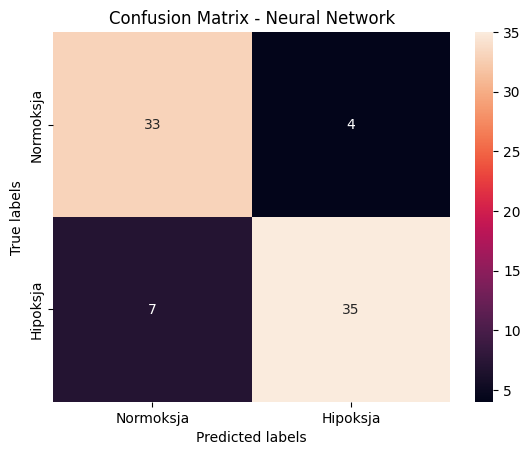

In [105]:
y_pred = NN_model.predict(X_test)
y_pred = y_pred > 0.6
y_pred = y_pred.astype(int)
raport = classification_report(y_test,y_pred,output_dict = False)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
ax.yaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
plt.savefig(save_to + "/NN_test.svg")
plt.show()

In [51]:
kf = KFold(n_splits=10, shuffle=True)

acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_normo = np.empty((10,1))
recall_arr_hipo = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_normo = np.empty((10,1))
precision_arr_hipo = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_normo = np.empty((10,1))
f1_arr_hipo = np.empty((10,1))

In [52]:
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #X_test.drop("Mean", inplace = True, axis = 1)
    #X_train.drop("Mean", inplace = True, axis = 1)
    X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    
    NN_model = keras.Sequential([
    keras.layers.Dense(16, input_shape = (X_train.shape[1],), activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation = "sigmoid"),
    ])
    NN_model.compile(optimizer = "adam",
                 loss= 'binary_crossentropy',
                 metrics = ["accuracy"])
    
    NN_model.fit(X_train, y_train, epochs = 5000)
    
    y_pred = NN_model.predict(X_test)
    y_pred = y_pred > 0.3
    y_pred = y_pred.astype(int)
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    recall_arr[i] =recall_score(y_test, y_pred,  average='weighted')
    
    raport = classification_report(y_test,y_pred,output_dict=True, zero_division=0)
    
    values_normo= list(raport["0"].values())
    precision_arr_normo[i] = values_normo[0]
    recall_arr_normo[i] = values_normo[1]
    f1_arr_normo[i] = values_normo[2]
    
    values_hipo= list(raport["1"].values())
    precision_arr_hipo[i] = values_hipo[0] 
    recall_arr_hipo[i] = values_hipo[1]
    f1_arr_hipo[i] = values_hipo[2]
    print(f"Fold {i+1}/{acc_arr.shape[0]}")
    print(f"y_test: {list(y_test)},  y_pred: {y_pred}")
    values_weighted_avg = list(raport["weighted avg"].values())


precision_arr = precision_arr[precision_arr != 0]
precision_arr_normo = precision_arr_normo[precision_arr_normo != 0]
precision_arr_hipo = precision_arr_hipo[precision_arr_hipo != 0]

f1_arr = f1_arr[f1_arr != 0]
f1_arr_normo = f1_arr_normo[f1_arr_normo != 0]
f1_arr_hipo = f1_arr_hipo[f1_arr_hipo != 0]

list_NN = ["Neural Network", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_normo.mean(),2), round(f1_arr_hipo.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_normo.mean(),2), round(recall_arr_hipo.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_normo.mean(),2), round(precision_arr_hipo.mean(),2)]
df_modeling_summary.loc[4] = list_NN
df_modeling_summary

Epoch 1/5000
8/8 [==============================] - 1s 4ms/step - loss: 0.7113 - accuracy: 0.4979
Epoch 2/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7218 - accuracy: 0.5106
Epoch 3/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5617
Epoch 4/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7213 - accuracy: 0.4936
Epoch 5/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5489
Epoch 6/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5064
Epoch 7/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4979
Epoch 8/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5574
Epoch 9/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.7067 - accuracy: 0.5021
Epoch 10/5000
8/8 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5660
Epoch 11/5000
8/8 [

NameError: name 'df_modeling_summary' is not defined

### XGBoost

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size = 0.7)
#X_test.drop("Mean", inplace = True, axis = 1)
#X_train.drop("Mean", inplace = True, axis = 1)

X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]

{'reg_lambda': 50, 'reg_alpha': 1, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.4}


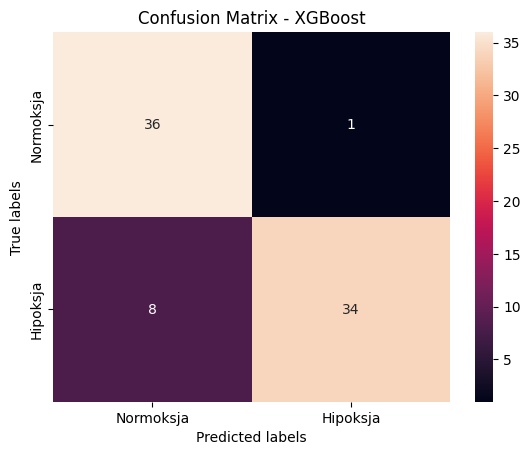

In [80]:
param_grid = {'gamma': [0, 0.1, 0.2, 0.4, 2, 6, 12, 50, 100, 200, 500],
              'learning_rate': [0.01, 0.03, 0.1, 0.4,  0.7],
              'max_depth': np.arange(1,11,1),
              'n_estimators': [50,100, 150, 200],
              'reg_alpha': [0, 0.01, 0.1, 1, 10, 50, 100, 200],
              'reg_lambda': [0, 0.01, 0.1, 1, 10, 50, 100, 200]}

xgbc0 = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

#clf = GridSearchCV(xgbc0, 
#                       param_grid = param_grid, 
#                       cv = 10, 
#                       verbose=1, n_jobs=-1, 
#                       scoring = "accuracy")


clf = RandomizedSearchCV(xgbc0, param_distributions=param_grid, 
    n_iter=20, cv=10, scoring = "accuracy") 

best_clf = clf.fit(X_train, y_train)
parameters= best_clf.best_params_
print(parameters)
parameters= list(parameters.values())

xgb_finall = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False,
                          gamma = parameters[0],
                          learning_rate = parameters[1],
                          max_depth = parameters[2],
                          n_estimators = parameters[3],
                          reg_alpha = parameters[4],
                          reg_lambda = parameters[5]
                              )

xgb_finall.fit(X_train, y_train)


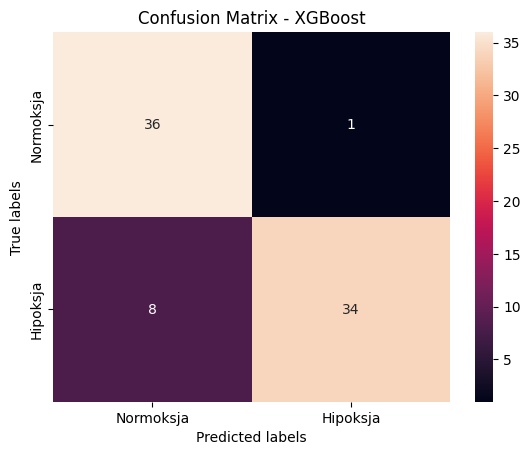

In [108]:
y_pred = xgb_finall.predict(X_test)

raport = classification_report(y_test, y_pred, output_dict = True)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)




fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XGBoost')
ax.xaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
ax.yaxis.set_ticklabels(["Normoksja", 'Hipoksja'])
plt.savefig(save_to + "/XGBoost_test.svg")
plt.show()

In [109]:
# Save report result 
df_log_test = pd.DataFrame(raport)
df_log_test = df_log_test.transpose()
df_log_test.to_excel(save_to + "/XGBoost_test.xlsx")

#### Cross validation

In [70]:
kf = KFold(n_splits=10, shuffle=True)

acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_normo = np.empty((10,1))
recall_arr_hipo = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_normo = np.empty((10,1))
precision_arr_hipo = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_normo = np.empty((10,1))
f1_arr_hipo = np.empty((10,1))

area_arr = np.empty((10, 1))
perim_arr = np.empty((10, 1))
circ_arr = np.empty((10, 1))
ar_arr = np.empty((10, 1))
round_arr = np.empty((10, 1))
solidity_arr = np.empty((10, 1))
mean_arr = np.empty((10, 1))

In [71]:
param_grid = {'gamma': [0, 0.1, 0.2, 0.4, 2, 6, 12, 50, 100, 200, 500],
              'learning_rate': [0.01, 0.03, 0.1, 0.4,  0.7],
              'max_depth': np.arange(1,11,1),
              'n_estimators': [50,100, 150, 200],
              'reg_alpha': [0, 0.01, 0.1, 1, 10, 50, 100, 200],
              'reg_lambda': [0, 0.01, 0.1, 1, 10, 50, 100, 200]}

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    
    xgbc0 = XGBClassifier(objective='binary:logistic')
    clf = RandomizedSearchCV(xgbc0, param_distributions=param_grid, n_iter=50, cv=10, scoring = "accuracy") 
    
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #X_test.drop("Mean", inplace = True, axis = 1)
    #X_train.drop("Mean", inplace = True, axis = 1)
    X_train = X_train.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    X_test = X_test.loc[:,["Area", "Perim,", "Circ,", "AR", "Round", "Solidity", "Mean"]]
    
    best_clf = clf.fit(X_train, y_train)
    parameters= best_clf.best_params_
    
    print(parameters)
    parameters= list(parameters.values())
    xgb_finall = XGBClassifier(objective='binary:logistic',
                          #booster='gbtree',
                          #eval_metric='auc',
                          #tree_method='hist',
                          #grow_policy='lossguide',
                          #use_label_encoder=False,
                          gamma = parameters[0],
                          learning_rate = parameters[1],
                          max_depth = parameters[2],
                          n_estimators = parameters[3],
                          reg_alpha = parameters[4],
                          reg_lambda = parameters[5]
                              )
    xgb_finall.fit(X_train, y_train)
    y_pred = xgb_finall.predict(X_test)
    
    perm_importance = permutation_importance(xgb_finall, X_test, y_test, n_repeats = 15, scoring = "accuracy")
    
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=0)
    recall_arr[i] =recall_score(y_test, y_pred,  average='weighted')
    
    raport = classification_report(y_test,y_pred,output_dict=True, zero_division=0)
    
    values_normo= list(raport["0"].values())
    precision_arr_normo[i] = values_normo[0]
    recall_arr_normo[i] = values_normo[1]
    f1_arr_normo[i] = values_normo[2]
    
    values_hipo= list(raport["1"].values())
    precision_arr_hipo[i] = values_hipo[0] 
    recall_arr_hipo[i] = values_hipo[1]
    f1_arr_hipo[i] = values_hipo[2]
    print(f"Fold {i+1}/{acc_arr.shape[0]}")
    print(f"y_test: {list(y_test)},  y_pred: {y_pred}")
    values_weighted_avg = list(raport["weighted avg"].values())
    
    area_arr[i] = perm_importance.get("importances_mean")[0]
    perim_arr[i] = perm_importance.get("importances_mean")[1]
    circ_arr[i] = perm_importance.get("importances_mean")[2]
    ar_arr[i] = perm_importance.get("importances_mean")[3]
    round_arr[i] = perm_importance.get("importances_mean")[4]
    solidity_arr[i] = perm_importance.get("importances_mean")[5]
    mean_arr[i] = perm_importance.get("importances_mean")[6]
    
    

precision_arr = precision_arr[precision_arr != 0]
precision_arr_normo = precision_arr_normo[precision_arr_normo != 0]
precision_arr_hipo = precision_arr_hipo[precision_arr_hipo != 0]

f1_arr = f1_arr[f1_arr != 0]
f1_arr_normo = f1_arr_normo[f1_arr_normo != 0]
f1_arr_hipo = f1_arr_hipo[f1_arr_hipo != 0]

list_xgb_finall = ["XGBClassifier", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_normo.mean(),2), round(f1_arr_hipo.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_normo.mean(),2), round(recall_arr_hipo.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_normo.mean(),2), round(precision_arr_hipo.mean(),2)]

list_xgb_finall_features = ["XGBClassifier", round(area_arr.mean(), 2),  round(float(sem(area_arr)),2), round(perim_arr.mean(), 2),  round(float(sem(perim_arr)),2), round(circ_arr.mean(), 2),  round(float(sem(circ_arr)),2), round(ar_arr.mean(), 2),  round(float(sem(ar_arr)),2), round(round_arr.mean(), 2),  round(float(sem(round_arr)),2),  round(solidity_arr.mean(), 2),  round(float(sem(solidity_arr)),2), round(mean_arr.mean(), 2),  round(float(sem(mean_arr)),2)]



df_modeling_summary.loc[5] = list_xgb_finall


df_feature_importance.loc[5] = list_xgb_finall_features

{'reg_lambda': 0.01, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.7, 'gamma': 0}
Fold 1/10
y_test: [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1],  y_pred: [0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1]
{'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.03, 'gamma': 0.2}
Fold 2/10
y_test: [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],  y_pred: [1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0]
{'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0.4}
Fold 3/10
y_test: [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],  y_pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
{'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.1}
Fold 4/10
y_test: [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1

In [72]:
df_modeling_summary

model accuracy_avg accuracy_sem f1-score_avg  \
1                       SVG         0.86         0.02         0.86   
2       Logistic_Regression         0.84         0.02         0.84   
3  Random_Forest_Classifier         0.83         0.02         0.83   
4            Neural Network         0.85         0.01         0.85   
5             XGBClassifier         0.78         0.05          0.8   

  f1-score_sem f1-score_normo f1-score_hipo recall_avg recall_sem  \
1         0.02           0.86          0.87       0.86       0.02   
2         0.02           0.84          0.84       0.84       0.02   
3         0.02           0.83          0.83       0.83       0.02   
4         0.01           0.84          0.85       0.85       0.01   
5         0.03            0.8           0.8       0.78       0.05   

  recall_normo recall_hipo precision_avg precision_sem precision_normo  \
1         0.89        0.85          0.87          0.01            0.84   
2         0.88        0.82          0.86          0.02            0.81   
3         0.86        0.81          0.84          0.02            0.82   
4         0.83        0.86          0.86          0.01            0.85   
5         0.75        0.83           0.8          0.05            0.79   

  precision_hipo  
1           0.89  
2           0.87  
3           0.86  
4           0.85  
5           0.81

### Graphical summary

In [73]:
x = np.arange(4)
SVG_results = df_modeling_summary.loc[df_modeling_summary["model"] == "SVG", ["accuracy_avg", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
SVG_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "SVG", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
Logistic_Regression_results = df_modeling_summary.loc[df_modeling_summary["model"] == "Logistic_Regression", ["accuracy_avg", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
Logistic_Regression_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "Logistic_Regression", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
Random_Forest_results = df_modeling_summary.loc[df_modeling_summary["model"] == "Random_Forest_Classifier", ["accuracy_avg", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
Random_Forest_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "Random_Forest_Classifier", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
NN_results = df_modeling_summary.loc[df_modeling_summary["model"] == "Neural Network", ["accuracy_avg", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
NN_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "Neural Network", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
XGB_results = df_modeling_summary.loc[df_modeling_summary["model"] == "XGBClassifier", ["accuracy_avg", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
XGB_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "XGBClassifier", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()

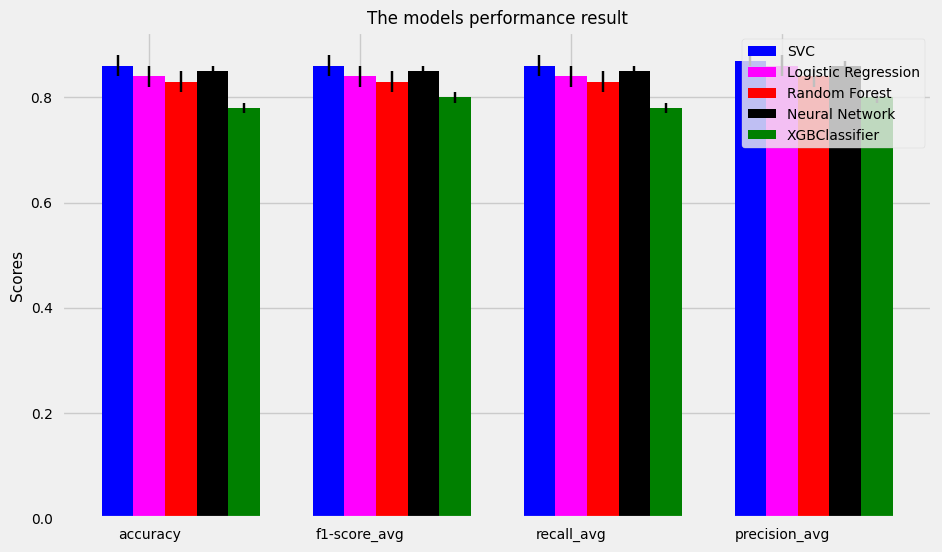

In [84]:
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(10,6))
width = 0.15
plt.bar(x -0.15, SVG_results[0], width, color='blue', yerr = SVG_sem[0])
plt.bar(x, Logistic_Regression_results[0], width, color='magenta', yerr = Logistic_Regression_sem[0])
plt.bar(x+ 0.15, Random_Forest_results[0], width, color='red', yerr = Random_Forest_sem[0])
plt.bar(x+ 0.3, NN_results[0], width, color='black', yerr = NN_sem[0])
plt.bar(x+ 0.45, XGB_results[0], width, color='green', yerr = NN_sem[0])
plt.xticks(x, ['accuracy', 'f1-score_avg', 'recall_avg', 'precision_avg'])
plt.ylabel("Scores")
plt.legend(["SVC", "Logistic Regression", "Random Forest", "Neural Network", "XGBClassifier"], loc='best')
plt.title("The models performance result")
save_fig_to = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Models_score_mean.svg"
plt.savefig(save_fig_to)
plt.show()

In [85]:
x = np.arange(7)

SVG_feature = df_feature_importance.loc[df_feature_importance["model"] == "SVG", ["area_avg", "perim_avg", "circ_avg", "ar_avg", "round_avg", "solidity_avg", "mean_avg"]].values.tolist()
SVG_feature_sem = df_feature_importance.loc[df_feature_importance["model"] == "SVG", ["area_avg", "perim_avg", "circ_avg", "ar_avg", "round_avg", "solidity_avg", "mean_sem"]].values.tolist()


Logistic_feature = df_feature_importance.loc[df_feature_importance["model"] == "Logistic_Regression", ["area_avg", "perim_avg", "circ_avg", "ar_avg", "round_avg", "solidity_avg", "mean_avg"]].values.tolist()
Logistic_feature_sem = df_feature_importance.loc[df_feature_importance["model"] == "Logistic_Regression", ["area_sem", "perim_sem", "circ_sem", "ar_sem", "round_sem", "solidity_sem", "mean_sem"]].values.tolist()

Random_Forest_feature = df_feature_importance.loc[df_feature_importance["model"] == "Random_Forest_Classifier", ["area_avg", "perim_avg", "circ_avg", "ar_avg", "round_avg", "solidity_avg", "mean_avg"]].values.tolist()
Random_Forest_feature_sem = df_feature_importance.loc[df_feature_importance["model"] == "Random_Forest_Classifier", ["area_sem", "perim_sem", "circ_sem", "ar_sem", "round_sem", "solidity_sem", "mean_sem"]].values.tolist()

XGB_Classifier_feature = df_feature_importance.loc[df_feature_importance["model"] == "XGBClassifier", ["area_avg", "perim_avg", "circ_avg", "ar_avg", "round_avg", "solidity_avg", "mean_avg"]].values.tolist()
XGB_Classifier_feature_sem = df_feature_importance.loc[df_feature_importance["model"] == "XGBClassifier", ["area_sem", "perim_sem", "circ_sem", "ar_sem", "round_sem", "solidity_sem", "mean_sem"]].values.tolist()



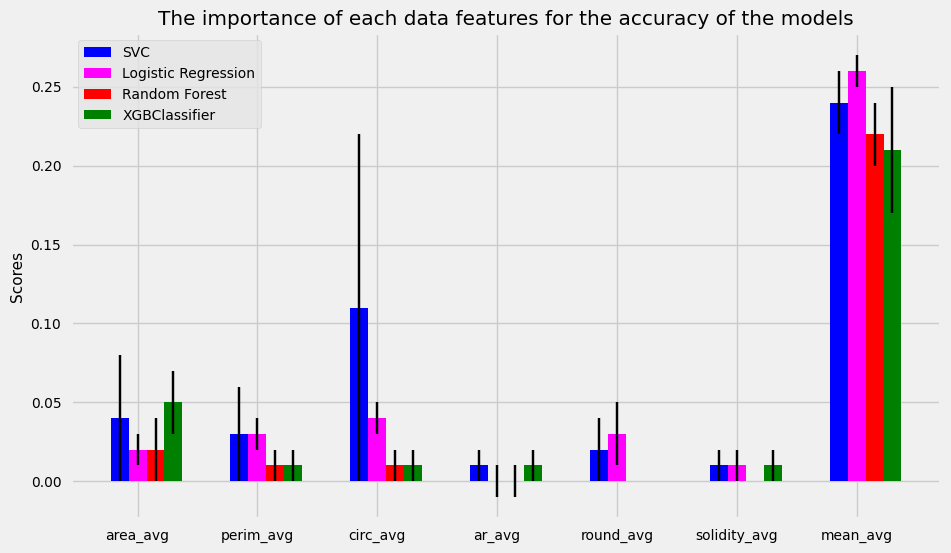

In [86]:
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(10,6))
width = 0.15
plt.bar(x -width, SVG_feature[0], width, color='blue', yerr = SVG_feature_sem[0])
plt.bar(x, Logistic_feature[0], width, color='magenta', yerr = Logistic_feature_sem[0])
plt.bar(x+ width, Random_Forest_feature[0], width, color='red', yerr = Random_Forest_feature_sem[0])
plt.style.use('ggplot')
#plt.bar(x+ 0.3, NN_results[0], width, color='black', yerr = NN_sem[0])
plt.bar(x+ width*2, XGB_Classifier_feature[0], width, color='green', yerr = XGB_Classifier_feature_sem[0])
plt.xticks(x, ["area_avg", "perim_avg", "circ_avg", "ar_avg", "round_avg", "solidity_avg", "mean_avg"])
plt.ylabel("Scores")
plt.legend(["SVC", "Logistic Regression", "Random Forest", "XGBClassifier"])
plt.title("The importance of each data features for the accuracy of the models")
save_fig_to = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Feature_score_mean.svg"
plt.savefig(save_fig_to)
plt.show()

In [87]:
df_modeling_summary.to_excel("C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Models_score_mean.xlsx")
df_feature_importance.to_excel("C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Feature_score_mean.xlsx")

In [110]:
#Save model SVC
filename = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/SVC_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [111]:
#Save model Logistic Regression
filename = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Log_model.sav"
pickle.dump(logModel, open(filename, 'wb'))

In [112]:
#Save model Random Forest
filename = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/Rfc_model.sav"
pickle.dump(rfcModel, open(filename, 'wb'))

In [113]:
#Save model NN
filename = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/NN_model.keras"
NN_model.save(filename)

In [114]:
#Save model XGBoost
filename = "C:/Users/gniew/Desktop/PRACA/Bio_fizyka/PANC/XGBoost_model.sav"
pickle.dump(xgb_finall, open(filename, 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))